In [42]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fooddata/lunch.csv
/kaggle/input/fooddata/dinner.csv
/kaggle/input/fooddata/breakfast.csv


## Loading Dataset

In [43]:
breakfast_df = pd.read_csv('/kaggle/input/fooddata/breakfast.csv')
breakfast_df = breakfast_df.drop(['Unnamed: 0'], axis = 1)

lunch_df = pd.read_csv('/kaggle/input/fooddata/lunch.csv')
lunch_df = lunch_df.drop(['Unnamed: 0'], axis = 1)

dinner_df = pd.read_csv('/kaggle/input/fooddata/dinner.csv')
dinner_df = dinner_df.drop(['Unnamed: 0'], axis = 1)

In [44]:
# Find the number of null values in each column of each DataFrame
breakfast_null_counts = breakfast_df.isnull().sum()
lunch_null_counts = lunch_df.isnull().sum()
dinner_null_counts = dinner_df.isnull().sum()

# Display the number of null values in each column for each DataFrame
print("Null values in breakfast_df:")
print(breakfast_null_counts)
print("\nNull values in lunch_df:")
print(lunch_null_counts)
print("\nNull values in dinner_df:")
print(dinner_null_counts)

Null values in breakfast_df:
RecipeID                 0
Name                     0
Ingredients              0
Servings Per Recipe      0
Calories                 0
Protein                  0
Total Carbohydrate       3
Total Fat                0
Saturated Fat            6
Cholesterol            118
Dietary Fiber           44
Sodium                   0
Rating                   0
Number of Ratings        0
URL                      0
dtype: int64

Null values in lunch_df:
RecipeID                 0
Name                     0
Ingredients              0
Servings Per Recipe      0
Calories                 0
Protein                  0
Total Carbohydrate       0
Total Fat                5
Saturated Fat           21
Cholesterol            102
Dietary Fiber            5
Sodium                   0
Rating                   0
Number of Ratings        0
URL                      0
dtype: int64

Null values in dinner_df:
RecipeID                0
Name                    0
Ingredients             0
Serv

In [45]:
breakfast_df = breakfast_df.fillna(0)
lunch_df = lunch_df.fillna(0)
dinner_df = dinner_df.fillna(0)

## Creating the Muscle Breakfast Dataframe

In [46]:
muscle_breakfast = breakfast_df[
    (breakfast_df['Protein'] >= 20)  # High protein content
]
muscle_breakfast

,RecipeID,Name,Ingredients,Servings Per Recipe,Calories,Protein,Total Carbohydrate,Total Fat,Saturated Fat,Cholesterol,Dietary Fiber,Sodium,Rating,Number of Ratings,URL
10,11,Adjarian Khachapuri,"1 ¼ cups whole milk, heated to lukewarm (110° ...",4,715,30,78.0,31,16.0,88.0,3.0,814,3.5,2,https://www.allrecipes.com/recipe/8525280/adja...
76,77,Savory Herb Waffles,2 cups all-purpose flour 2 teaspoons baking po...,6,511,20,41.0,30,9.0,135.0,1.0,1044,4.5,17,https://www.allrecipes.com/recipe/46291/savory...
84,86,Protein Waffles,1 cup old-fashioned oats 1 cup cottage cheese ...,3,254,21,23.0,9,4.0,135.0,3.0,408,4.7,65,https://www.allrecipes.com/recipe/241252/prote...
101,103,Nutty Pecan Waffles,3 cups all-purpose flour 1 tablespoon baking p...,4,1184,23,97.0,81,19.0,185.0,7.0,701,4.6,27,https://www.allrecipes.com/recipe/23789/nutty-...
120,122,Chocolate Banana Peanut Butter Protein Shake,6 ice cubes 1 cup milk 1 banana 1 scoop choc...,1,561,31,67.0,23,7.0,60.0,6.0,341,4.8,97,https://www.allrecipes.com/recipe/244959/choco...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059,1093,Strawberry Banana Protein Shake,1 cup skim milk 1 scoop vanilla-flavored whey ...,2,261,26,31.0,5,1.0,9.0,4.0,187,4.6,19,https://www.allrecipes.com/recipe/244960/straw...
1069,1103,Green Monster Smoothie,1 cup fat-free milk ½ cup fat-free plain yogur...,1,382,24,56.0,9,2.0,7.0,5.0,328,4.6,142,https://www.allrecipes.com/recipe/222708/green...
1070,1104,Lela's Protein Mango Smoothie,"½ mango, chopped, or more to taste ½ cup low-...",1,401,45,49.0,4,2.0,19.0,2.0,379,4.8,21,https://www.allrecipes.com/recipe/238647/lelas...
1089,1125,Pumpkin Spice Protein Drink,"1 cup unsweetened almond milk 2 bananas, slic...",2,280,22,46.0,3,1.0,6.0,8.0,192,4.8,24,https://www.allrecipes.com/recipe/237690/pumpk...


## Preprocessing and Normalization of Muscle Building Breakfast Data

In [47]:
from sklearn.preprocessing import MinMaxScaler

nutritional_columns = ['Protein', 'Total Carbohydrate', 'Total Fat', 'Saturated Fat', 
                      'Cholesterol', 'Dietary Fiber', 'Sodium']
muscle_breakfast['Scaling_Factor']=1000/muscle_breakfast['Calories']
for column in nutritional_columns:
    muscle_breakfast[column] *= muscle_breakfast['Scaling_Factor']

/tmp/ipykernel_33/4160182586.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  muscle_breakfast['Scaling_Factor']=1000/muscle_breakfast['Calories']
/tmp/ipykernel_33/4160182586.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  muscle_breakfast[column] *= muscle_breakfast['Scaling_Factor']


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

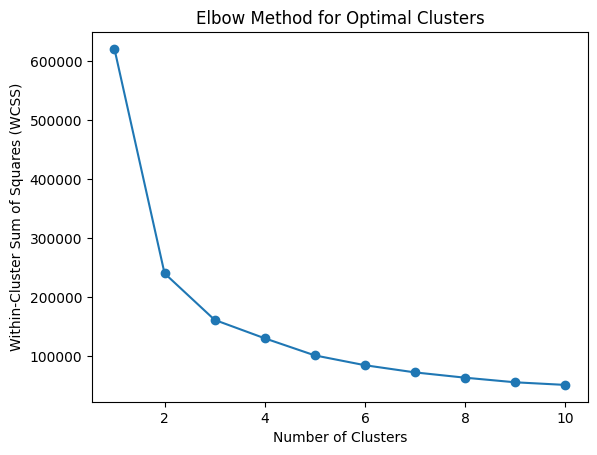

In [48]:
taste_columns=['Protein','Total Carbohydrate','Total Fat','Dietary Fiber']
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
max_clusters = 10
wcss = []

# Calculate the within-cluster sum of squares (WCSS) for different numbers of clusters
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i,init='k-means++', random_state=42)
    kmeans.fit(muscle_breakfast[taste_columns])
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, max_clusters + 1), wcss, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

In [49]:
clusters=4
kmeans = KMeans(n_clusters=clusters,init="k-means++", random_state=42)
kmeans.fit(muscle_breakfast[taste_columns])
# Add the cluster labels to the DataFrame
muscle_breakfast['Cluster'] = kmeans.labels_

# Display the cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)

Cluster Centers:
[[ 48.38422318  65.57105693  62.17989586   6.36441689]
 [ 67.51362107 143.01361516  21.64187737  16.30266889]
 [ 59.48696435  30.70465211  73.48701924   2.80808794]
 [ 39.89098392 111.82298485  46.49021792   8.30181213]]


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_33/4056350190.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  muscle_breakfast['Cluster'] = kmeans.labels_


In [50]:
for i in range(0,clusters):
    print(muscle_breakfast['Cluster'].value_counts().get(i,0))

82
30
114
36


In [151]:
muscle_breakfast

,RecipeID,Name,Ingredients,Servings Per Recipe,Calories,Protein,Total Carbohydrate,Total Fat,Saturated Fat,Cholesterol,Dietary Fiber,Sodium,Rating,Number of Ratings,URL,Scaling_Factor,Cluster
10,11,Adjarian Khachapuri,"1 ¼ cups whole milk, heated to lukewarm (110° ...",4,715,41.958042,109.090909,43.356643,22.377622,123.076923,4.195804,1138.461538,3.5,2,https://www.allrecipes.com/recipe/8525280/adja...,1.398601,0
76,77,Savory Herb Waffles,2 cups all-purpose flour 2 teaspoons baking po...,6,511,39.138943,80.234834,58.708415,17.612524,264.187867,1.956947,2043.052838,4.5,17,https://www.allrecipes.com/recipe/46291/savory...,1.956947,0
84,86,Protein Waffles,1 cup old-fashioned oats 1 cup cottage cheese ...,3,254,82.677165,90.551181,35.433071,15.748031,531.496063,11.811024,1606.299213,4.7,65,https://www.allrecipes.com/recipe/241252/prote...,3.937008,3
101,103,Nutty Pecan Waffles,3 cups all-purpose flour 1 tablespoon baking p...,4,1184,19.425676,81.925676,68.412162,16.047297,156.250000,5.912162,592.060811,4.6,27,https://www.allrecipes.com/recipe/23789/nutty-...,0.844595,0
120,122,Chocolate Banana Peanut Butter Protein Shake,6 ice cubes 1 cup milk 1 banana 1 scoop choc...,1,561,55.258467,119.429590,40.998217,12.477718,106.951872,10.695187,607.843137,4.8,97,https://www.allrecipes.com/recipe/244959/choco...,1.782531,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059,1093,Strawberry Banana Protein Shake,1 cup skim milk 1 scoop vanilla-flavored whey ...,2,261,99.616858,118.773946,19.157088,3.831418,34.482759,15.325670,716.475096,4.6,19,https://www.allrecipes.com/recipe/244960/straw...,3.831418,3
1069,1103,Green Monster Smoothie,1 cup fat-free milk ½ cup fat-free plain yogur...,1,382,62.827225,146.596859,23.560209,5.235602,18.324607,13.089005,858.638743,4.6,142,https://www.allrecipes.com/recipe/222708/green...,2.617801,3
1070,1104,Lela's Protein Mango Smoothie,"½ mango, chopped, or more to taste ½ cup low-...",1,401,112.219451,122.194514,9.975062,4.987531,47.381546,4.987531,945.137157,4.8,21,https://www.allrecipes.com/recipe/238647/lelas...,2.493766,3
1089,1125,Pumpkin Spice Protein Drink,"1 cup unsweetened almond milk 2 bananas, slic...",2,280,78.571429,164.285714,10.714286,3.571429,21.428571,28.571429,685.714286,4.8,24,https://www.allrecipes.com/recipe/237690/pumpk...,3.571429,3


## Creating the Muscle Lunch Dataframe

In [51]:
muscle_lunch_df = lunch_df[lunch_df['Protein'] >= 20]
muscle_lunch_df

,RecipeID,Name,Ingredients,Servings Per Recipe,Calories,Protein,Total Carbohydrate,Total Fat,Saturated Fat,Cholesterol,Dietary Fiber,Sodium,Rating,Number of Ratings,URL
6,7,Turkey Wraps,1 (8 ounce) package cream cheese with chives 2...,6,457,24,37,28.0,13.0,78.0,6.0,1438,4.6,126,https://www.allrecipes.com/recipe/79098/turkey...
22,24,Terrific Turkey Chili,"3 tablespoons vegetable oil, divided 1 ½ pound...",6,506,35,24,32.0,13.0,125.0,6.0,1521,4.8,1089,https://www.allrecipes.com/recipe/62763/terrif...
27,29,Muffuletta Sandwich,1 (1 pound) loaf fresh Italian bread ⅓ cup oli...,4,975,46,61,60.0,22.0,107.0,4.0,2790,4.6,70,https://www.allrecipes.com/recipe/34367/mufful...
39,41,School Lunch Bagel Sandwich,1 tablespoon herb and garlic flavored cream ch...,1,474,20,67,16.0,10.0,44.0,11.0,1055,4.7,30,https://www.allrecipes.com/recipe/153642/schoo...
40,42,"Turkey, Cranberry, and Spinach Roll-Ups","1 (8 ounce) package cream cheese, at room temp...",4,547,28,78,23.0,13.0,96.0,7.0,1743,4.7,25,https://www.allrecipes.com/recipe/239341/turke...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,452,Coronation Chicken,"6 skinless, boneless chicken breast halves ⅓ ...",6,476,27,28,30.0,5.0,70.0,2.0,302,4.8,42,https://www.allrecipes.com/recipe/79538/corona...
441,455,Cobb Salad,"6 slices bacon 3 eggs 1 head iceberg lettuce,...",6,525,32,10,40.0,10.0,179.0,4.0,915,4.8,477,https://www.allrecipes.com/recipe/14415/cobb-s...
454,468,Greek-Style Chicken Salad,1 cup diced English cucumbers 1 ¼ teaspoons sa...,4,385,37,9,22.0,9.0,115.0,1.0,1327,4.8,6,https://www.allrecipes.com/recipe/260452/greek...
457,471,Weeknight Skillet Slaw,1 tablespoon chipotle hot sauce (such as Cholu...,4,302,24,13,18.0,4.0,88.0,2.0,682,4.5,159,https://www.allrecipes.com/recipe/253157/weekn...


In [52]:
nutritional_columns = ['Protein', 'Total Carbohydrate', 'Total Fat', 'Saturated Fat', 
                      'Cholesterol', 'Dietary Fiber', 'Sodium']
muscle_lunch_df['Scaling_Factor']=1000/muscle_lunch_df['Calories']
for column in nutritional_columns:
    muscle_lunch_df[column] *= muscle_lunch_df['Scaling_Factor']

/tmp/ipykernel_33/2989641535.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  muscle_lunch_df['Scaling_Factor']=1000/muscle_lunch_df['Calories']
/tmp/ipykernel_33/2989641535.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  muscle_lunch_df[column] *= muscle_lunch_df['Scaling_Factor']


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

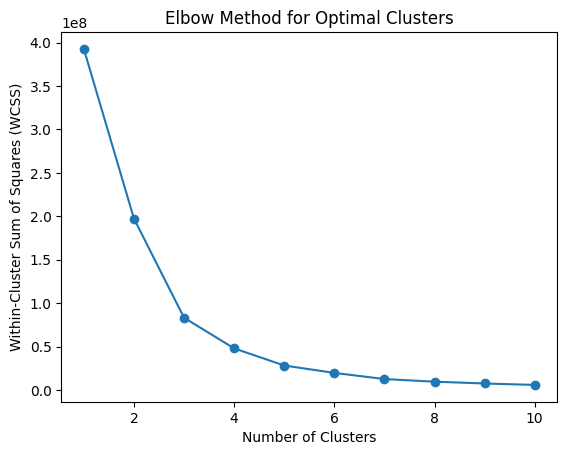

In [54]:
taste_columns=['Protein','Total Carbohydrate','Total Fat','Dietary Fiber','Sodium']
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
max_clusters = 10
wcss = []

# Calculate the within-cluster sum of squares (WCSS) for different numbers of clusters
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i,init='k-means++', random_state=42)
    kmeans.fit(muscle_lunch_df[taste_columns])
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, max_clusters + 1), wcss, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

In [55]:
clusters=4
kmeans = KMeans(n_clusters=clusters,init="k-means++", random_state=42)

kmeans.fit(muscle_lunch_df[taste_columns])
# Add the cluster labels to the DataFrame
muscle_lunch_df['Cluster'] = kmeans.labels_

# Display the cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)

Cluster Centers:
[[5.90648769e+01 9.08941588e+01 4.57151213e+01 1.08066890e+01
  2.63736812e+03]
 [7.26797386e+01 9.64538294e+01 3.54415954e+01 1.50594939e+01
  1.17204760e+04]
 [5.90570992e+01 8.17534097e+01 4.98346021e+01 9.05777668e+00
  1.32835164e+03]
 [6.34960663e+01 1.01096220e+02 4.29819239e+01 1.27117646e+01
  4.76653559e+03]]


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_33/2231301081.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  muscle_lunch_df['Cluster'] = kmeans.labels_


In [56]:
for i in range(0,clusters):
    print(muscle_lunch_df['Cluster'].value_counts().get(i,0))

80
2
84
13


## Creating the Muscle Dinner Dataframe

In [57]:
muscle_dinner_df = dinner_df[dinner_df['Protein'] >= 30]
muscle_dinner_df

,RecipeID,Name,Ingredients,Servings Per Recipe,Calories,Protein,Total Carbohydrate,Total Fat,Saturated Fat,Cholesterol,Dietary Fiber,Sodium,Rating,Number of Ratings,URL
2,3,Air Fryer Lobster Tails with Lemon-Garlic Butter,2 (4 ounce) lobster tails 4 tablespoons butter...,2.0,563,35,60.0,27,15,163.0,13.0,450,4.8,46,https://www.allrecipes.com/recipe/276006/air-f...
5,6,How to Cook Trout,"¼ cup butter 2 (8 ounce) whole trout, butterfl...",2.0,470,40,2.0,33,17,181.0,0.0,263,4.9,136,https://www.allrecipes.com/recipe/235851/how-t...
8,9,Broiled Scallops,1 ½ pounds bay scallops 2 tablespoons melted b...,3.0,273,38,7.0,9,5,95.0,0.0,2232,4.3,741,https://www.allrecipes.com/recipe/12798/broile...
12,13,Oh My Arctic Char!,"1 (10 ounce) fillet arctic char, rinsed and pa...",2.0,545,32,10.0,39,6,38.0,2.0,455,4.8,69,https://www.allrecipes.com/recipe/223074/oh-my...
13,14,Baked Halibut with Crispy Panko,½ cup panko bread crumbs 1 ½ tablespoons butte...,2.0,404,51,21.0,14,6,106.0,0.0,591,4.6,69,https://www.allrecipes.com/recipe/237179/baked...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,784,Cornbread Taco Bake,1 pound ground beef 3 tablespoons taco seasoni...,5.0,724,42,65.0,32,13,144.0,9.0,1881,0.0,0,https://www.allrecipes.com/cornbread-taco-bake...
780,808,Roast Beef and Pan Gravy for Beginners,3 1/2 to 4 teaspoons kosher salt (use 1 teaspo...,6.0,730,96,8.0,36,14,287.0,2.0,1120,4.5,6,https://www.allrecipes.com/roast-beef-and-pan-...
796,824,Creamy Gnocchi with Vegetables,2 tablespoons butter 1 (12 ounce) package prep...,0.0,1441,43,203.0,51,28,223.0,19.0,675,0.0,0,https://www.allrecipes.com/creamy-gnocchi-with...
800,828,Steak and Potato Foil Packets,"1 pound small Yukon Gold potatoes, halved 1 1/...",4.0,665,50,34.0,36,17,187.0,5.0,335,5.0,2,https://www.allrecipes.com/steak-and-potato-fo...


In [58]:
nutritional_columns = ['Protein', 'Total Carbohydrate', 'Total Fat', 'Saturated Fat', 
                      'Cholesterol', 'Dietary Fiber', 'Sodium']
muscle_dinner_df['Scaling_Factor']=1000/muscle_dinner_df['Calories']
for column in nutritional_columns:
    muscle_dinner_df[column] *= muscle_dinner_df['Scaling_Factor']

/tmp/ipykernel_33/1338314728.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  muscle_dinner_df['Scaling_Factor']=1000/muscle_dinner_df['Calories']
/tmp/ipykernel_33/1338314728.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  muscle_dinner_df[column] *= muscle_dinner_df['Scaling_Factor']


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

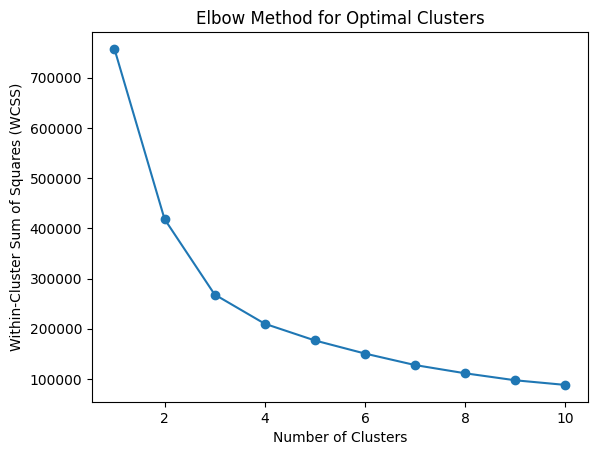

In [60]:
taste_columns=['Protein','Total Carbohydrate','Total Fat','Dietary Fiber']
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
max_clusters = 10
wcss = []

# Calculate the within-cluster sum of squares (WCSS) for different numbers of clusters
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i,init='k-means++', random_state=42)
    kmeans.fit(muscle_dinner_df[taste_columns])
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, max_clusters + 1), wcss, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

In [61]:
clusters=4
kmeans = KMeans(n_clusters=clusters,init="k-means++", random_state=42)

kmeans.fit(muscle_dinner_df[taste_columns])
# Add the cluster labels to the DataFrame
muscle_dinner_df['Cluster'] = kmeans.labels_

# Display the cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)

for i in range(0,clusters):
    print(muscle_dinner_df['Cluster'].value_counts().get(i,0))

Cluster Centers:
[[ 66.93511404  97.23707012  38.55961134   9.99854436]
 [ 78.26120156  14.10559379  69.01201192   2.08719163]
 [129.67803096  27.05717599  39.0950536    2.61174839]
 [ 65.89271515  54.64913048  57.67406492   6.21711169]]
77
83
61
91


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_33/2267044147.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  muscle_dinner_df['Cluster'] = kmeans.labels_


## Creating the Heart Breakfast Dataframe

In [64]:
# Filter the DataFrame for breakfast recipes based on heart-healthy criteria
heart_breakfast_df = breakfast_df[(breakfast_df['Total Fat'] <= 8) & 
                                 (breakfast_df['Cholesterol'] <= 20) ]

In [65]:
nutritional_columns = ['Protein', 'Total Carbohydrate', 'Total Fat', 'Saturated Fat', 
                      'Cholesterol', 'Dietary Fiber', 'Sodium']
heart_breakfast_df['Scaling_Factor']=1000/heart_breakfast_df['Calories']
for column in nutritional_columns:
    heart_breakfast_df[column] *= heart_breakfast_df['Scaling_Factor']

/tmp/ipykernel_33/3743923604.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_breakfast_df['Scaling_Factor']=1000/heart_breakfast_df['Calories']
/tmp/ipykernel_33/3743923604.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_breakfast_df[column] *= heart_breakfast_df['Scaling_Factor']


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

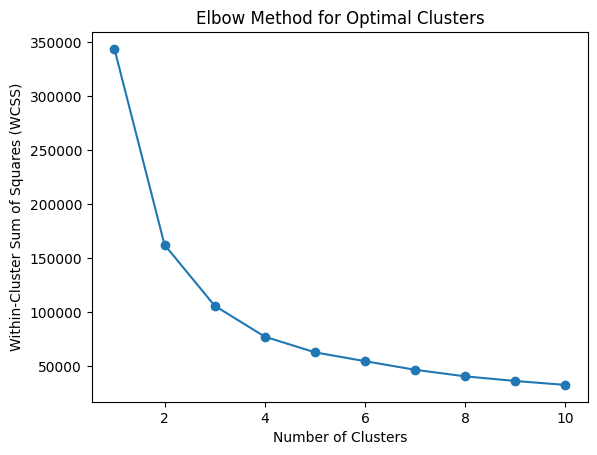

In [66]:
taste_columns=['Protein','Total Carbohydrate','Total Fat','Dietary Fiber']
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
max_clusters = 10
wcss = []

# Calculate the within-cluster sum of squares (WCSS) for different numbers of clusters
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i,init='k-means++', random_state=42)
    kmeans.fit(heart_breakfast_df[taste_columns])
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, max_clusters + 1), wcss, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

In [67]:
clusters=3
kmeans = KMeans(n_clusters=clusters,init="k-means++", random_state=42)

kmeans.fit(heart_breakfast_df[taste_columns])
# Add the cluster labels to the DataFrame
heart_breakfast_df['Cluster'] = kmeans.labels_

# Display the cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)

Cluster Centers:
[[ 30.27351599 185.57799458  18.39784312  18.82780948]
 [ 20.71058102 234.63362905   6.49442243  28.26453978]
 [ 51.86871462 142.72494878  28.65282643  17.64224743]]


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_33/2835594012.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_breakfast_df['Cluster'] = kmeans.labels_


In [68]:
for i in range(0,clusters):
    print(heart_breakfast_df['Cluster'].value_counts().get(i,0))

93
57
38


## Creating the Heart Lunch Dataframe

In [76]:
heart_lunch_df = lunch_df[(lunch_df['Total Fat'] <= 15) & (lunch_df['Cholesterol'] <= 20) ]

In [77]:
heart_lunch_df

,RecipeID,Name,Ingredients,Servings Per Recipe,Calories,Protein,Total Carbohydrate,Total Fat,Saturated Fat,Cholesterol,Dietary Fiber,Sodium,Rating,Number of Ratings,URL
1,2,Quinoa and Black Beans,"1 teaspoon vegetable oil 1 onion, chopped 3 c...",10,153,8,28,2.0,0.0,0.0,8.0,517,4.7,6040,https://www.allrecipes.com/recipe/49552/quinoa...
2,3,Apple Chips,"2 Golden Delicious apples, cored and thinly s...",6,24,0,7,0.0,0.0,0.0,1.0,1,4.1,110,https://www.allrecipes.com/recipe/233281/apple...
3,4,Peanut Butter Noodles,8 ounces Udon noodles ½ cup chicken broth 3 ta...,4,330,11,47,12.0,2.0,0.0,2.0,1188,4.5,1542,https://www.allrecipes.com/recipe/11835/peanut...
4,5,"Chicken, Rice, and Vegetable Soup","5 cups water, or more as needed, divided 1 (14...",4,105,3,22,1.0,0.0,3.0,2.0,1077,4.5,224,https://www.allrecipes.com/recipe/15257/chicke...
5,6,Granola Bars,cooking spray 2 cups rolled oats ½ cup shred...,8,188,4,34,5.0,2.0,0.0,3.0,64,4.3,119,https://www.allrecipes.com/recipe/223467/grano...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,461,Asparagus Salad,¼ cup olive oil 2 tablespoons lemon juice 12 ...,6,110,3,3,10.0,2.0,2.0,2.0,50,4.8,71,https://www.allrecipes.com/recipe/74083/grille...
448,462,Turkey Salad,¾ pound cooked turkey meat 2 stalks celery 2 ...,24,40,4,1,2.0,0.0,11.0,0.0,78,4.6,190,https://www.allrecipes.com/recipe/27005/turkey...
455,469,Three Bean Salad,1 (15 ounce) can green beans 1 pound wax beans...,16,112,2,16,5.0,1.0,0.0,2.0,299,4.6,308,https://www.allrecipes.com/recipe/13637/three-...
461,475,Green Salad,½ cup chopped onion ½ cup chopped green bell p...,8,47,3,5,2.0,0.0,3.0,2.0,163,4.7,18,https://www.allrecipes.com/recipe/14452/green-...


In [78]:
nutritional_columns = ['Protein', 'Total Carbohydrate', 'Total Fat', 'Saturated Fat', 
                      'Cholesterol', 'Dietary Fiber', 'Sodium']
heart_lunch_df['Scaling_Factor']=1000/heart_lunch_df['Calories']
for column in nutritional_columns:
    heart_lunch_df[column] *= heart_lunch_df['Scaling_Factor']

/tmp/ipykernel_33/3992729809.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_lunch_df['Scaling_Factor']=1000/heart_lunch_df['Calories']
/tmp/ipykernel_33/3992729809.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_lunch_df[column] *= heart_lunch_df['Scaling_Factor']


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

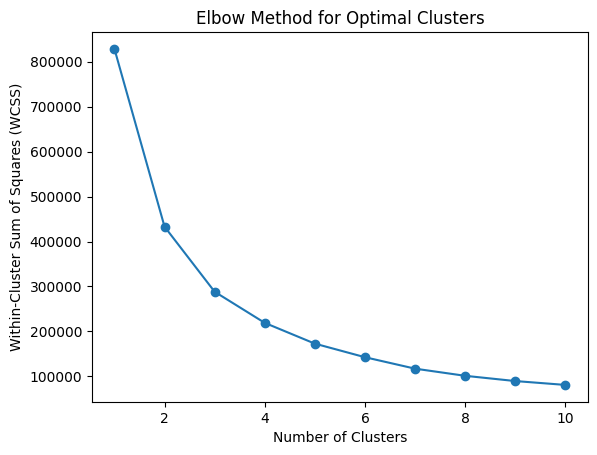

In [79]:
taste_columns=['Protein','Total Carbohydrate','Total Fat','Dietary Fiber']
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
max_clusters = 10
wcss = []

# Calculate the within-cluster sum of squares (WCSS) for different numbers of clusters
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i,init='k-means++', random_state=42)
    kmeans.fit(heart_lunch_df[taste_columns])
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, max_clusters + 1), wcss, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

In [80]:
clusters=3
kmeans = KMeans(n_clusters=clusters,init="k-means++", random_state=42)

kmeans.fit(heart_lunch_df[taste_columns])
# Add the cluster labels to the DataFrame
heart_lunch_df['Cluster'] = kmeans.labels_

# Display the cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)

Cluster Centers:
[[ 35.48281093 154.99727481  31.22710167  27.14692591]
 [ 59.43542627  67.42255599  56.24081259  12.91914758]
 [ 23.62900045 230.33610679   5.40671645  43.75584999]]


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_33/774888495.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_lunch_df['Cluster'] = kmeans.labels_


In [81]:
for i in range(0,clusters):
    print(heart_lunch_df['Cluster'].value_counts().get(i,0))

90
25
49


## Creating the Heart Dinner Dataframe

In [82]:
heart_dinner_df = dinner_df[(dinner_df['Total Fat'] <= 15) & 
                            (dinner_df['Cholesterol'] <= 20) ]

In [83]:
nutritional_columns = ['Protein', 'Total Carbohydrate', 'Total Fat', 'Saturated Fat', 
                      'Cholesterol', 'Dietary Fiber', 'Sodium']
heart_dinner_df['Scaling_Factor']=1000/heart_dinner_df['Calories']
for column in nutritional_columns:
    heart_dinner_df[column] *= heart_dinner_df['Scaling_Factor']

/tmp/ipykernel_33/742993307.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_dinner_df['Scaling_Factor']=1000/heart_dinner_df['Calories']
/tmp/ipykernel_33/742993307.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_dinner_df[column] *= heart_dinner_df['Scaling_Factor']


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

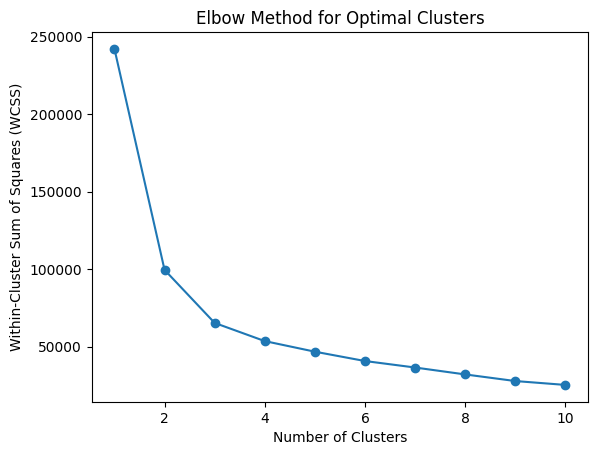

In [84]:
taste_columns=['Protein','Total Carbohydrate','Total Fat','Dietary Fiber']
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
max_clusters = 10
wcss = []

# Calculate the within-cluster sum of squares (WCSS) for different numbers of clusters
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i,init='k-means++', random_state=42)
    kmeans.fit(heart_dinner_df[taste_columns])
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, max_clusters + 1), wcss, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

In [85]:
clusters=4
kmeans = KMeans(n_clusters=clusters,init="k-means++", random_state=42)

kmeans.fit(heart_dinner_df[taste_columns])
# Add the cluster labels to the DataFrame
heart_dinner_df['Cluster'] = kmeans.labels_

# Display the cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)

Cluster Centers:
[[ 27.17103622 108.99147474  55.82634826  20.50600168]
 [ 26.18713183  49.92291412  80.380362    11.62013477]
 [ 32.73789524 180.64369378  18.86907472  28.17431236]
 [ 39.25880437 149.7702909   31.88765929  23.36300574]]


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_33/730665179.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_dinner_df['Cluster'] = kmeans.labels_


In [86]:
for i in range(0,clusters):
    print(heart_dinner_df['Cluster'].value_counts().get(i,0))

30
10
24
26


## Exporting DataFrames to CSV Files

In [87]:
heart_dinner_df.to_csv('heart_dinner_df.csv', index=False)
heart_breakfast_df.to_csv('heart_breakfast_df.csv', index=False)
heart_lunch_df.to_csv('heart_lunch_df.csv', index=False)
muscle_dinner_df.to_csv('muscle_dinner_df.csv', index=False)
muscle_lunch_df.to_csv('muscle_lunch_df.csv', index=False)
muscle_breakfast.to_csv('muscle_breakfast.csv', index=False)